In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "warframe_weapons.csv"
df = pd.read_csv(path)

print("\nПЕРВЫЕ СТРОКИ")
print(df.head())

print("\nПОСЛЕДНИЕ СТРОКИ")
print(df.tail())

print("\nИНФОРМАЦИЯ О ДАННЫХ")
print(df.info())

print("\nТИПЫ ДАННЫХ")
print(df.dtypes)

for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass

print("\nТИПЫ ПОСЛЕ ПРИВЕДЕНИЯ ")
print(df.dtypes)



ПЕРВЫЕ СТРОКИ
          Name      Trigger      AttackName  Impact  Puncture  Slash  Cold  \
0  Tenet Tetra  Auto / Semi   Normal Attack    13.2      33.6   13.2     0   
1  Tenet Tetra  Auto / Semi  Grenade Impact   200.0       0.0    0.0     0   
2  Tenet Tetra  Auto / Semi     Grenade AoE     0.0       0.0    0.0     0   
3   Ambassador         Auto            Auto     0.0       0.0    0.0     0   
4   Ambassador       Charge          Charge     0.0       0.0    0.0     0   

   Electricity  Heat  Toxin  ...  IntroducedDate     Slot  Class  AmmoType  \
0            0   0.0      0  ...      2021-07-06  Primary  Rifle   Primary   
1            0   0.0      0  ...      2021-07-06  Primary  Rifle   Primary   
2            0   0.0      0  ...      2021-07-06  Primary  Rifle   Primary   
3           24   0.0      0  ...      2021-07-06  Primary  Rifle   Primary   
4          600   0.0      0  ...      2021-07-06  Primary  Rifle   Primary   

   Range                                       

In [17]:
print("\nПРОПУСКИ ПО СТОЛБЦАМ")
print(df.isna().sum())

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = [c for c in df.columns if c not in num_cols]

for col in num_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nПРОПУСКИ ПОСЛЕ ЗАПОЛНЕНИЯ")
print(df.isna().sum())



ПРОПУСКИ ПО СТОЛБЦАМ
Name                  0
Trigger               0
AttackName            0
Impact                0
Puncture              0
Slash                 0
Cold                  0
Electricity           0
Heat                  0
Toxin                 0
Blast                 0
Corrosive             0
Gas                   0
Magnetic              0
Radiation             0
Viral                 0
Void                  0
BaseDamage            0
BaseDps               0
TotalDamage           0
CritChance            0
CritMultiplier        0
AvgShotDmg            0
BurstDps              0
SustainedDps         29
LifetimeDmg          27
StatusChance          0
ForcedProcs           0
AvgProcCount          0
AvgProcPerSec         0
Multishot             0
FireRate              0
ChargeTime            0
Disposition           0
Mastery               0
Magazine              0
AmmoPickup            0
AmmoMax               0
Reload                0
ShotType              0
ShotSpeed         

In [18]:
print("\nДУБЛИКАТЫ")
print("Количество:", df.duplicated().sum())

df = df.drop_duplicates()

print("Размер после удаления:", df.shape)



ДУБЛИКАТЫ
Количество: 68
Размер после удаления: (656, 54)


In [19]:
print("\nВЫБРОСЫ (|z| > 3)")
for col in num_cols:
    if df[col].std() == 0:
        continue
    z = (df[col] - df[col].mean()) / df[col].std()
    print(col, (np.abs(z) > 3).sum(), "выбросов")



ВЫБРОСЫ (|z| > 3)
Impact 13 выбросов
Puncture 12 выбросов
Slash 9 выбросов
Cold 2 выбросов
Electricity 10 выбросов
Heat 4 выбросов
Toxin 2 выбросов
Blast 2 выбросов
Corrosive 1 выбросов
Gas 3 выбросов
Magnetic 10 выбросов
Radiation 7 выбросов
Viral 2 выбросов
Void 10 выбросов
BaseDamage 14 выбросов
BaseDps 0 выбросов
TotalDamage 10 выбросов
CritChance 6 выбросов
CritMultiplier 26 выбросов
AvgShotDmg 12 выбросов
BurstDps 4 выбросов
SustainedDps 3 выбросов
LifetimeDmg 0 выбросов
StatusChance 5 выбросов
AvgProcCount 7 выбросов
AvgProcPerSec 16 выбросов
Multishot 24 выбросов
FireRate 0 выбросов
ChargeTime 27 выбросов
Disposition 0 выбросов
Mastery 0 выбросов
Magazine 18 выбросов
AmmoPickup 33 выбросов
AmmoMax 0 выбросов
Reload 5 выбросов
ShotSpeed 0 выбросов
PunchThrough 1 выбросов
Accuracy 4 выбросов
Range 22 выбросов
FalloffStart 11 выбросов
FalloffEnd 0 выбросов
FalloffReduction 16 выбросов


In [20]:
print("\nОПИСАТЕЛЬНАЯ СТАТИСТИКА")
print(df.describe(include="all"))

print("\nУНИКАЛЬНЫЕ ЗНАЧЕНИЯ (<=20)")
for col in df.columns:
    if df[col].nunique() <= 20:
        print(f"\n{col}")
        print(df[col].value_counts())

corr = df[num_cols].corr()
print("\nКОРРЕЛЯЦИОННАЯ МАТРИЦА")
print(corr)



ОПИСАТЕЛЬНАЯ СТАТИСТИКА
             Name    Trigger     AttackName      Impact    Puncture  \
count         656        656            656  656.000000  656.000000   
unique        375         23            162         NaN         NaN   
top     Phantasma  Semi-Auto  Normal Attack         NaN         NaN   
freq            5        180            229         NaN         NaN   
mean          NaN        NaN            NaN   30.576692   30.845023   
std           NaN        NaN            NaN   73.521473   85.489474   
min           NaN        NaN            NaN    0.000000    0.000000   
25%           NaN        NaN            NaN    0.000000    0.000000   
50%           NaN        NaN            NaN    4.600000    4.000000   
75%           NaN        NaN            NaN   20.000000   24.000000   
max           NaN        NaN            NaN  600.000000  850.000000   

              Slash        Cold  Electricity         Heat       Toxin  ...  \
count    656.000000  656.000000   656.000000

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


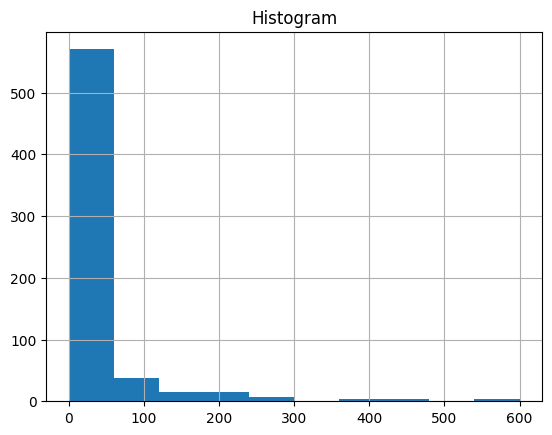

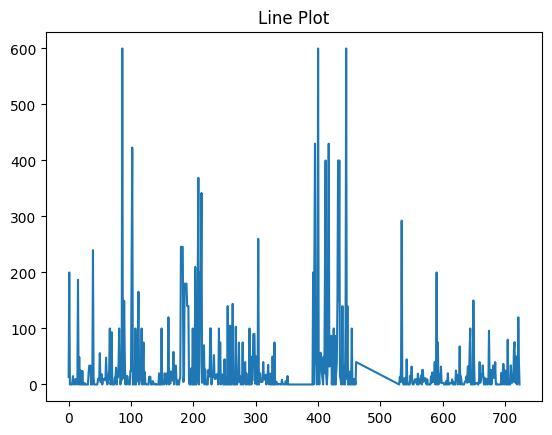

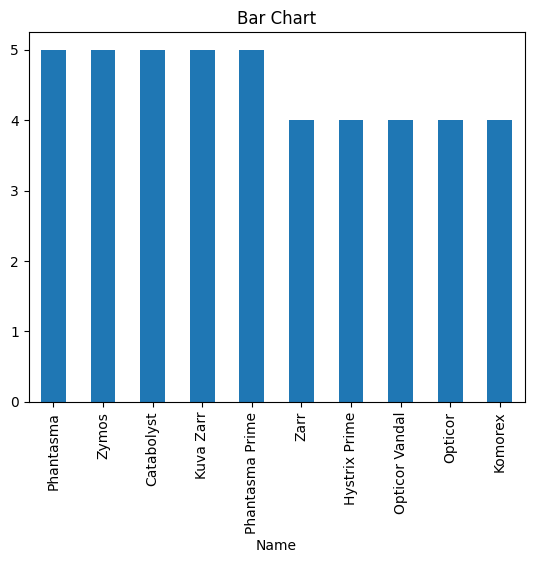

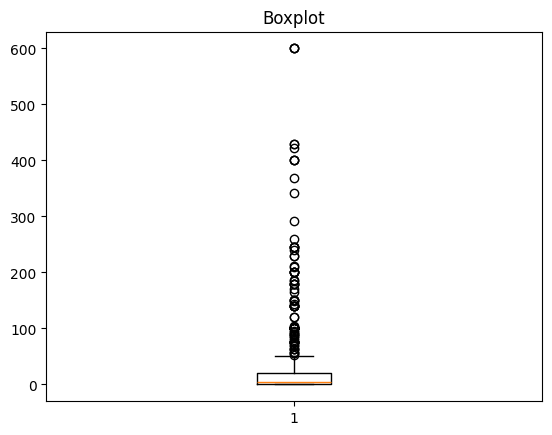

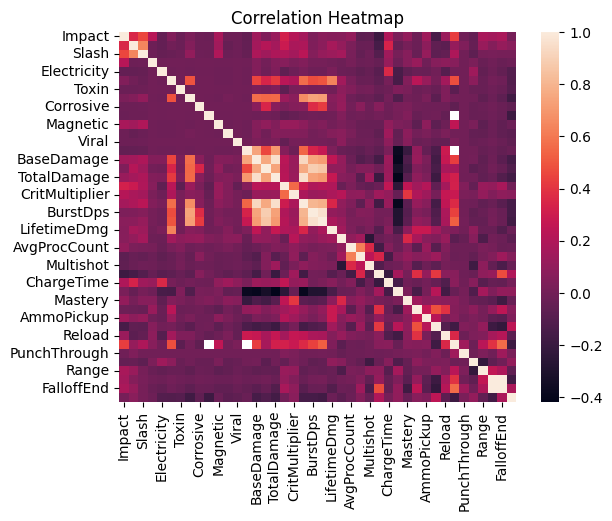

In [21]:
plt.figure()
df[num_cols[0]].hist()
plt.title("Histogram")
plt.show()

plt.figure()
plt.plot(df[num_cols[0]])
plt.title("Line Plot")
plt.show()

if cat_cols:
    plt.figure()
    df[cat_cols[0]].value_counts().head(10).plot(kind="bar")
    plt.title("Bar Chart")
    plt.show()

plt.figure()
plt.boxplot(df[num_cols[0]])
plt.title("Boxplot")
plt.show()

plt.figure()
sns.heatmap(corr, annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [22]:
if cat_cols:
    group_col = cat_cols[0]
else:
    group_col = f"{num_cols[0]}_bins"
    df[group_col] = pd.qcut(df[num_cols[0]], q=4)

grouped = df.groupby(group_col)[num_cols[0]]

print("\nСРЕДНЕЕ ПО ГРУППАМ")
print(grouped.mean())

print("\nМЕДИАНА ПО ГРУППАМ")
print(grouped.median())

print("\nКОЛИЧЕСТВО")
print(grouped.count())

if len(num_cols) >= 2:
    pivot = pd.pivot_table(
        df,
        values=num_cols[1],
        index=group_col,
        aggfunc=["mean", "sum", "count"]
    )

    print("\nСВОДНАЯ ТАБЛМЦА")
    print(pivot)



СРЕДНЕЕ ПО ГРУППАМ
Name
Acceltra       17.500000
Acrid           0.000000
Aegrit          2.250000
Aeolak         24.400000
Afentis        86.666667
                 ...    
Zenith          9.750000
Zhuge           5.000000
Zhuge Prime    10.600000
Zylok          44.800000
Zymos           1.840000
Name: Impact, Length: 375, dtype: float64

МЕДИАНА ПО ГРУППАМ
Name
Acceltra       17.50
Acrid           0.00
Aegrit          2.25
Aeolak         15.00
Afentis        20.00
               ...  
Zenith          9.75
Zhuge           5.00
Zhuge Prime    10.60
Zylok          44.80
Zymos           0.00
Name: Impact, Length: 375, dtype: float64

КОЛИЧЕСТВО
Name
Acceltra       2
Acrid          1
Aegrit         2
Aeolak         3
Afentis        3
              ..
Zenith         2
Zhuge          1
Zhuge Prime    2
Zylok          1
Zymos          5
Name: Impact, Length: 375, dtype: int64

СВОДНАЯ ТАБЛМЦА
                mean      sum    count
            Puncture Puncture Puncture
Name                 